<a href="https://colab.research.google.com/github/hendrywijaya98/Linear-Regression-Practice/blob/main/Student_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google Drive Directory Access

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/Data\ Science\ Practice/Linear\ Regresion\ Practice/

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/Data Science Practice/Linear Regresion Practice


Import starter Library

In [ ]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Accessing Kaggle API

In [ ]:
# token dict
api_token = {"username" : "hendrylian98",
             "key" : "fc899b158919eb2f2ce78e23cdf390de"}

# apply to os environ 
os.environ['KAGGLE_USERNAME'] = api_token["username"] 
os.environ['KAGGLE_KEY'] = api_token["key"]

# Data Collection
Download data through kaggle API

In [ ]:
!kaggle datasets download -d spscientist/students-performance-in-exams

  0% 0.00/8.70k [00:00<?, ?B/s]
100% 8.70k/8.70k [00:00<00:00, 1.15MB/s]


Unzip the zipped file to extract data

In [ ]:
from zipfile import ZipFile

with ZipFile("students-performance-in-exams.zip", 'r') as zip:
  zip.extractall()

Import Dataset

In [ ]:
# import financial data from 2014 - 2018
student_perform_df = pd.read_csv('StudentsPerformance.csv')

## Data Inspection

In [ ]:
# rename column to be clean column name
student_perform_df.rename(columns={'race/ethnicity': 'ethnic_group',
                                   'parental level of education':'parental_level',
                                   'test preparation course':'prepared_test',
                                   'math score':'math_score',
                                   'reading score':'reading_score',
                                   'writing score':'writing_score'}, 
                          inplace=True)

add total marks and its average

In [ ]:
# adding total marks which contain total of mark score's accumulation
student_perform_df['total_mark'] = student_perform_df['math_score'] \
 + student_perform_df['reading_score'] + student_perform_df['writing_score']
# adding average of marks, by divide of number of marks, 
# then round into only 2 number behind comma
student_perform_df['average_mark']=(student_perform_df['total_mark']/3).round(2)

Read data from top rows

In [ ]:
# view top rows data (defaultly 5)
student_perform_df.head()

,gender,ethnic_group,parental_level,lunch,prepared_test,math_score,reading_score,writing_score,total_mark,average_mark
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [ ]:
# view shape of data, consist of (rows, columns)
student_perform_df.shape

(1000, 11)

In [ ]:
# looking data info to check data type, non-null if all data rows exist
student_perform_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          1000 non-null   object 
 1   ethnic_group    1000 non-null   object 
 2   parental_level  1000 non-null   object 
 3   lunch           1000 non-null   object 
 4   prepared_test   1000 non-null   object 
 5   math_score      1000 non-null   int64  
 6   reading_score   1000 non-null   int64  
 7   writing_score   1000 non-null   int64  
 8   total_score     1000 non-null   int64  
 9   total_mark      1000 non-null   int64  
 10  average_mark    1000 non-null   float64
dtypes: float64(1), int64(5), object(5)
memory usage: 86.1+ KB


In [ ]:
# looking for numerical statistical descriptive
student_perform_df.describe()

,math_score,reading_score,writing_score,total_score,total_mark,average_mark
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,300.000000,100.000000


In [ ]:
# looking for categorical statistical descriptive
student_perform_df.describe(include = ['O'])

,gender,ethnic_group,parental_level,lunch,prepared_test
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [ ]:
# view number of gender
student_perform_df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

Text(0, 0.5, 'Number of Gender')

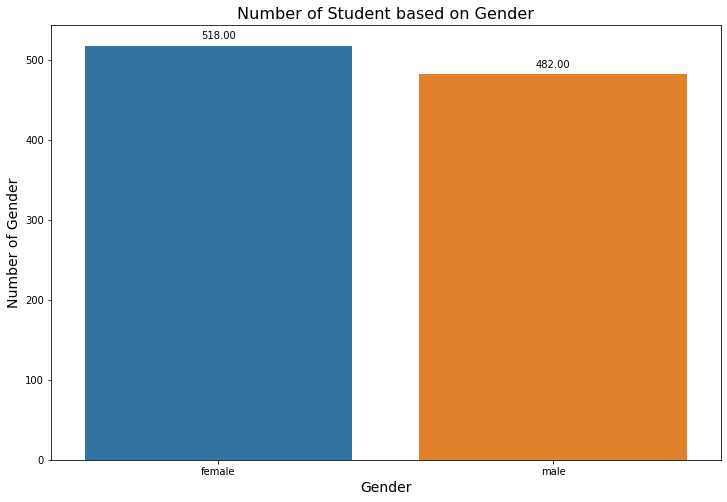

In [ ]:
# view number of gender by plot
plt.subplots(figsize=(12, 8))
coplot = sns.countplot(x='gender', data=student_perform_df)

for pat in coplot.patches:
    coplot.annotate(format(pat.get_height(), '.2f'), 
                    (pat.get_x() + pat.get_width() / 2., pat.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), 
                    textcoords = 'offset points')
    
plt.title('Number of Student based on Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Gender', fontsize=14)

In [ ]:
# view number of ethnic group
student_perform_df['ethnic_group'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: ethnic_group, dtype: int64

Text(0, 0.5, 'Number of Ethnic Group')

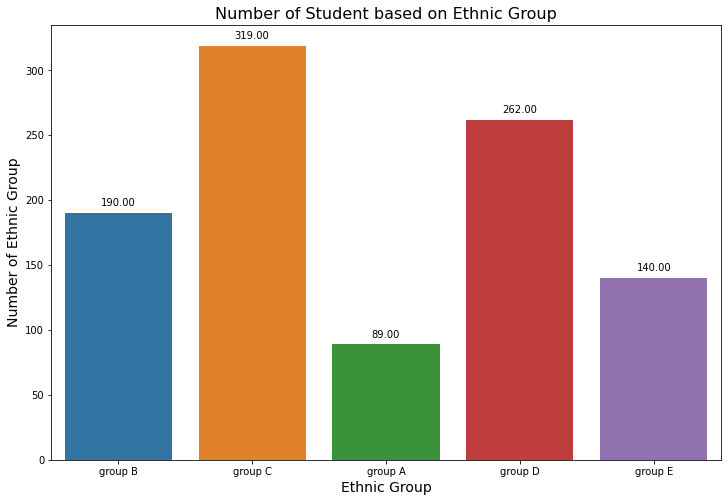

In [ ]:
# view number of ethnic group by plot
plt.subplots(figsize=(12, 8))
coplot = sns.countplot(x='ethnic_group', data=student_perform_df)

for pat in coplot.patches:
    coplot.annotate(format(pat.get_height(), '.2f'), 
                    (pat.get_x() + pat.get_width() / 2., pat.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), 
                    textcoords = 'offset points')
    
plt.title('Number of Student based on Ethnic Group', fontsize=16)
plt.xlabel('Ethnic Group', fontsize=14)
plt.ylabel('Number of Ethnic Group', fontsize=14)

In [ ]:
# view number of parental level
student_perform_df['parental_level'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level, dtype: int64

Text(0, 0.5, 'Number of Ethnic Group')

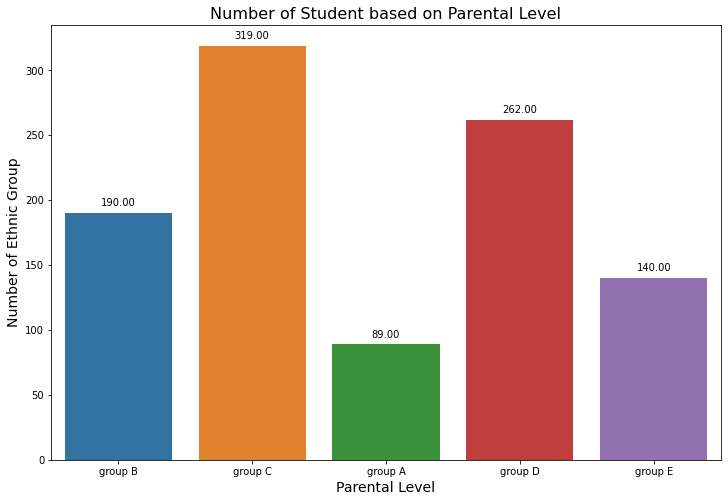

In [ ]:
# view number of parental level by plot
plt.subplots(figsize=(12, 8))
coplot = sns.countplot(x='ethnic_group', data=student_perform_df)

for pat in coplot.patches:
    coplot.annotate(format(pat.get_height(), '.2f'), 
                    (pat.get_x() + pat.get_width() / 2., pat.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), 
                    textcoords = 'offset points')
    
plt.title('Number of Student based on Parental Level', fontsize=16)
plt.xlabel('Parental Level', fontsize=14)
plt.ylabel('Number of Ethnic Group', fontsize=14)

In [ ]:
# view number of lunch type
student_perform_df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

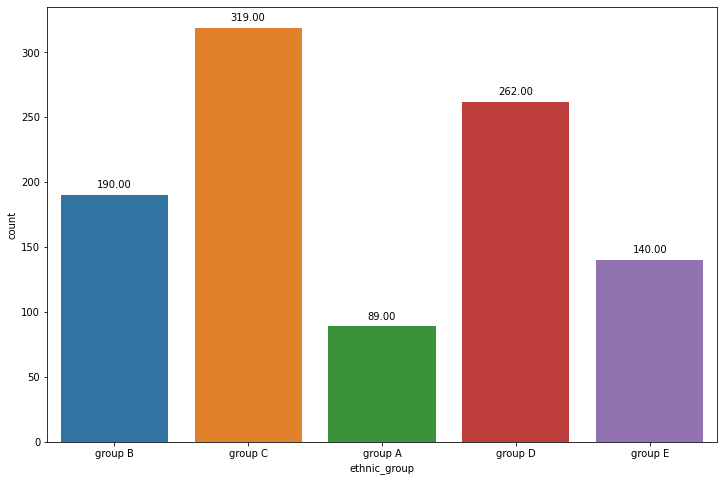

In [ ]:
# view number of parental level by plot
plt.subplots(figsize=(12, 8))
coplot = sns.countplot(x='ethnic_group', data=student_perform_df)

for pat in coplot.patches:
    coplot.annotate(format(pat.get_height(), '.2f'), 
                    (pat.get_x() + pat.get_width() / 2., pat.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), 
                    textcoords = 'offset points')

In [ ]:
# view number of prepared test
student_perform_df['prepared_test'].value_counts()

none         642
completed    358
Name: prepared_test, dtype: int64

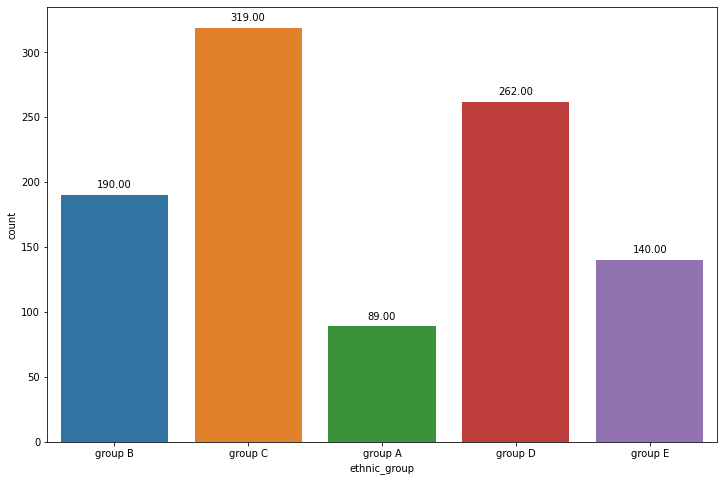

In [ ]:
# view number of parental level by plot
plt.subplots(figsize=(12, 8))
coplot = sns.countplot(x='ethnic_group', data=student_perform_df)

for pat in coplot.patches:
    coplot.annotate(format(pat.get_height(), '.2f'), 
                    (pat.get_x() + pat.get_width() / 2., pat.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), 
                    textcoords = 'offset points')

In [ ]:
# looking for average from each score and total marks
print(f"""Student Overall Average Math Score : {student_perform_df['math_score'].mean()}
Student Overall Average Reading Score : {student_perform_df['reading_score'].mean()}
Student Overall Average Writing Score : {student_perform_df['writing_score'].mean()}
Student Overall Average Total Marks : {(student_perform_df['total_mark'].mean())/3:.3f}""")

Student Overall Average Math Score : 66.089
Student Overall Average Reading Score : 69.169
Student Overall Average Writing Score : 68.054
Student Overall Average Total Marks : 67.771


In [ ]:
# view the order of student with higher score than 80
student_perform_df[(student_perform_df['math_score']>80) & (student_perform_df['reading_score']>80) \
                   & (student_perform_df['writing_score']>80)
                   ].sort_values(by=['total_mark'],ascending=False)

,gender,ethnic_group,parental_level,lunch,prepared_test,math_score,reading_score,writing_score,total_mark,average_mark
962,female,group E,associate's degree,standard,none,100,100,100,300,100.00
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.00
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.00
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.67
179,female,group D,some high school,standard,completed,97,100,100,297,99.00
...,...,...,...,...,...,...,...,...,...,...
49,male,group C,high school,standard,completed,82,84,82,248,82.67
742,female,group C,high school,standard,none,81,84,82,247,82.33
876,male,group D,some college,standard,none,81,82,84,247,82.33
713,male,group D,master's degree,standard,none,81,81,84,246,82.00


Grading System, based on average mark that represent overall score 
- Grade A, from 100 to 85
- Grade B, from 84 to 70
- Grade C, from 69 to 60
- Grade D, from 59 to 50
- Grade E, from 49 to 45
- Grade F, under 45

In [ ]:
# create grading function
def grade_system(row):
    # grade a from 100 to 85
    if row['average_mark'] >= 85:
        val = 'A'
    # grade b from 84 to 70
    elif (row['average_mark'] < 85) and (row['average_mark'] >= 70):
        val = 'B'
    # grade c from 69 to 60
    elif (row['average_mark'] < 70) and (row['average_mark'] >= 60):
        val = 'C'
    # grade d from 59 to 50
    elif (row['average_mark'] < 60) and (row['average_mark'] >= 50):
        val = 'D'
    # grade e from 49 to 45
    elif (row['average_mark'] < 50) and (row['average_mark'] >= 45):
        val = 'E'
    # grade f under 45
    else :
        val = 'F'
    return val

# create new column grade
student_perform_df['grade'] = student_perform_df.apply(grade_system, axis=1)

In [ ]:
student_perform_df[['average_mark', 'grade']].sort_values(by='average_mark', ascending=False)

,average_mark,grade
916,100.00,A
458,100.00,A
962,100.00,A
114,99.67,A
179,99.00,A
...,...,...
76,26.00,F
327,23.33,F
596,23.00,F
980,18.33,F


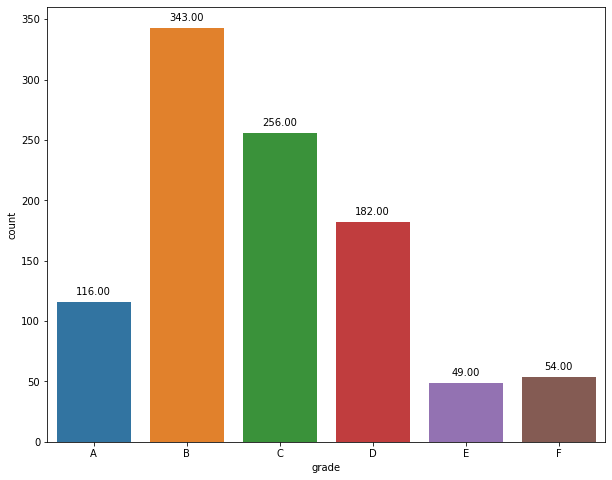

In [ ]:
plt.subplots(figsize=(10, 8))
coplot = sns.countplot(x='grade', data=student_perform_df, 
                       order=['A','B','C','D','E','F'])

for pat in coplot.patches:
    coplot.annotate(format(pat.get_height(), '.2f'), 
                    (pat.get_x() + pat.get_width() / 2., pat.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), 
                    textcoords = 'offset points')

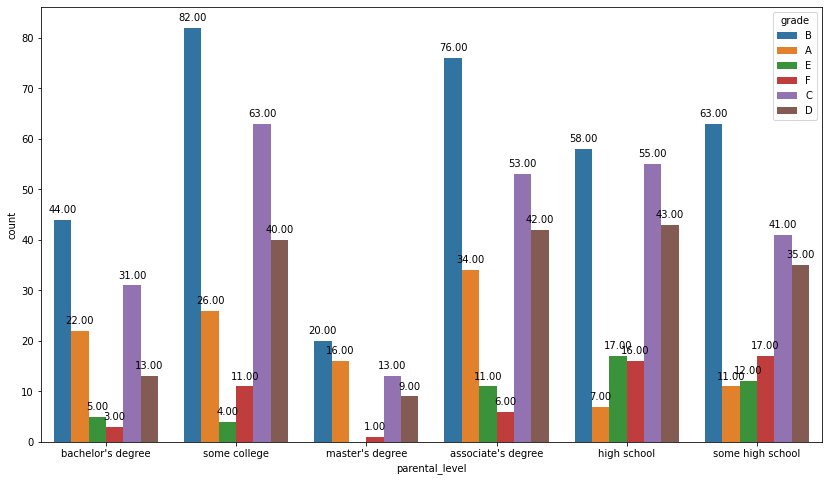

In [ ]:
# view number of grade based on parental level
plt.subplots(figsize=(14, 8))
coplot = sns.countplot(x='parental_level', data=student_perform_df, 
                       hue='grade')

for pat in coplot.patches:
    coplot.annotate(format(pat.get_height(), '.2f'), 
                    (pat.get_x() + pat.get_width() / 2., pat.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), 
                    textcoords = 'offset points')

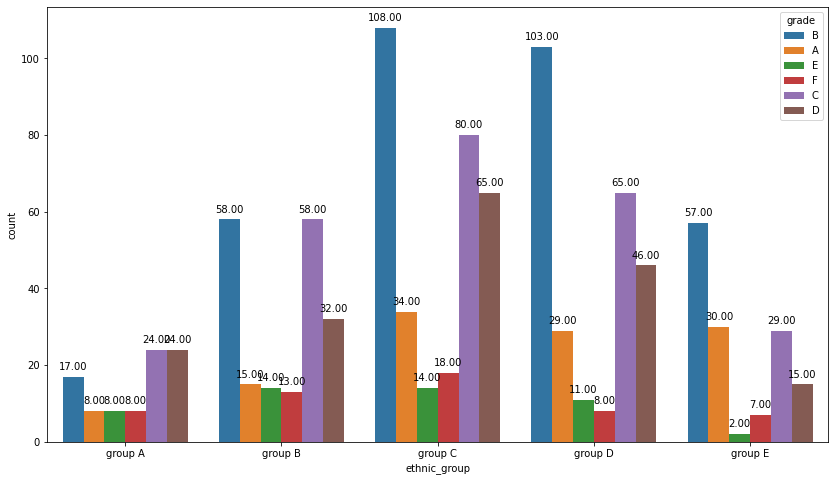

In [ ]:
# view number of grade based on ethnic group
plt.subplots(figsize=(14, 8))
coplot = sns.countplot(x='ethnic_group', data=student_perform_df, 
                order=['group A', 'group B', 'group C', 'group D', 'group E'], 
                       hue='grade')

for pat in coplot.patches:
    coplot.annotate(format(pat.get_height(), '.2f'), 
                    (pat.get_x() + pat.get_width() / 2., pat.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), 
                    textcoords = 'offset points')

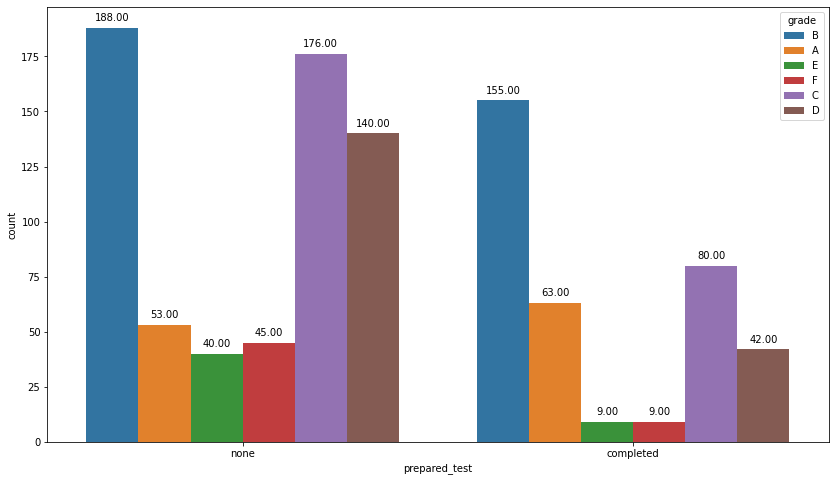

In [ ]:
# view number of grade based on test preparation
plt.subplots(figsize=(14, 8))
coplot = sns.countplot(x='prepared_test', data=student_perform_df, 
                       hue='grade')

for pat in coplot.patches:
    coplot.annotate(format(pat.get_height(), '.2f'), 
                    (pat.get_x() + pat.get_width() / 2., pat.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), 
                    textcoords = 'offset points')

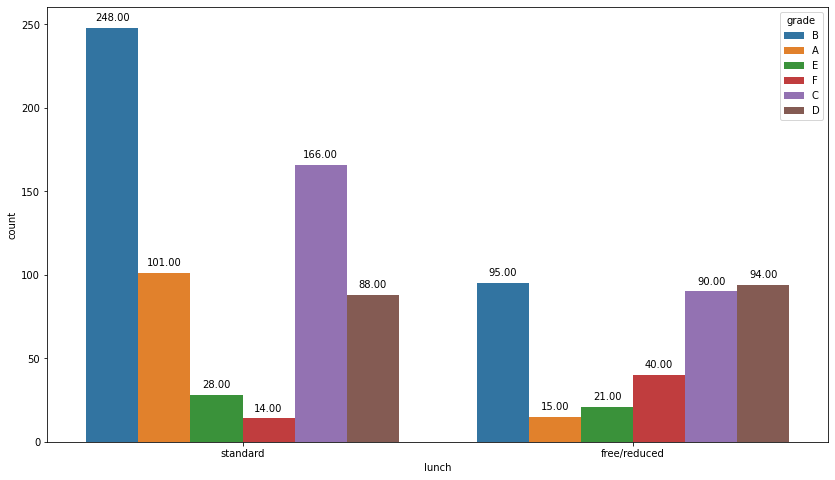

In [ ]:
# view number of grade based on lunch
plt.subplots(figsize=(14, 8))
coplot = sns.countplot(x='lunch', data=student_perform_df, 
                       hue='grade')

for pat in coplot.patches:
    coplot.annotate(format(pat.get_height(), '.2f'), 
                    (pat.get_x() + pat.get_width() / 2., pat.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), 
                    textcoords = 'offset points')

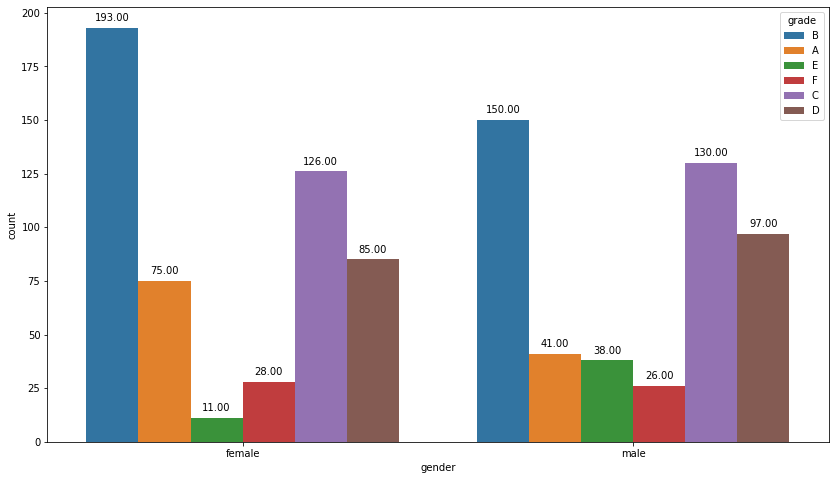

In [ ]:
# view number of grade based on gender
plt.subplots(figsize=(14, 8))
coplot = sns.countplot(x='gender', data=student_perform_df, 
                       hue='grade')

for pat in coplot.patches:
    coplot.annotate(format(pat.get_height(), '.2f'), 
                    (pat.get_x() + pat.get_width() / 2., pat.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), 
                    textcoords = 'offset points')

In [ ]:
# categorical column to be encoded into numeric form
from sklearn.preprocessing import LabelEncoder

labenc = LabelEncoder()

student_perform_df['gender_code'] = labenc.fit_transform(student_perform_df['gender'])
student_perform_df['ethnic_code'] = labenc.fit_transform(student_perform_df['ethnic_group'])
student_perform_df['parental_code'] = labenc.fit_transform(student_perform_df['parental_level'])
student_perform_df['lunch_code'] = labenc.fit_transform(student_perform_df['lunch'])
student_perform_df['prepared_code'] = labenc.fit_transform(student_perform_df['prepared_test'])

In [ ]:
student_perform_df.head(10)

,gender,ethnic_group,parental_level,lunch,prepared_test,math_score,reading_score,writing_score,total_mark,average_mark,grade,ethnic_code,parental_code,lunch_code,prepared_code,gender_code
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67,B,1,1,1,1,0
1,female,group C,some college,standard,completed,69,90,88,247,82.33,B,2,4,1,0,0
2,female,group B,master's degree,standard,none,90,95,93,278,92.67,A,1,3,1,1,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33,E,0,0,0,1,1
4,male,group C,some college,standard,none,76,78,75,229,76.33,B,2,4,1,1,1
5,female,group B,associate's degree,standard,none,71,83,78,232,77.33,B,1,0,1,1,0
6,female,group B,some college,standard,completed,88,95,92,275,91.67,A,1,4,1,0,0
7,male,group B,some college,free/reduced,none,40,43,39,122,40.67,F,1,4,0,1,1
8,male,group D,high school,free/reduced,completed,64,64,67,195,65.00,C,3,2,0,0,1
9,female,group B,high school,free/reduced,none,38,60,50,148,49.33,E,1,2,0,1,0


Text(0.5, 1.0, 'Correlation of Student Score with Factors')

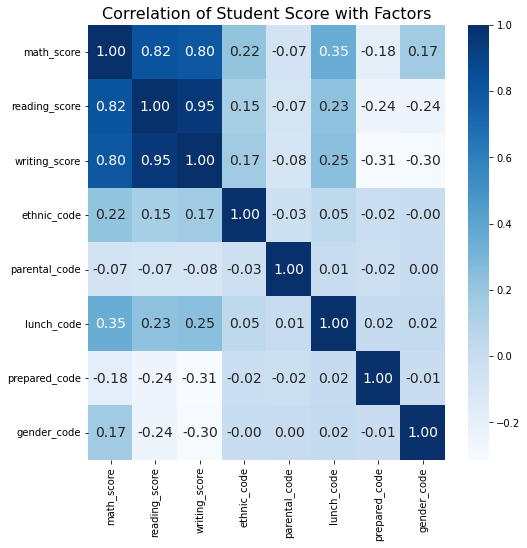

In [ ]:
# student performa correlation
perform_metrics = student_perform_df[['math_score', 'reading_score', 'writing_score', 
                              'ethnic_code', 'parental_code', 'lunch_code', 'prepared_code', 'gender_code']]

# correlation based on numeric variabel only
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(perform_metrics.corr(), fmt= '.2f', cmap='Blues', annot=True, annot_kws={"size":14})

plt.title('Correlation of Student Score with Factors', fontsize=16)